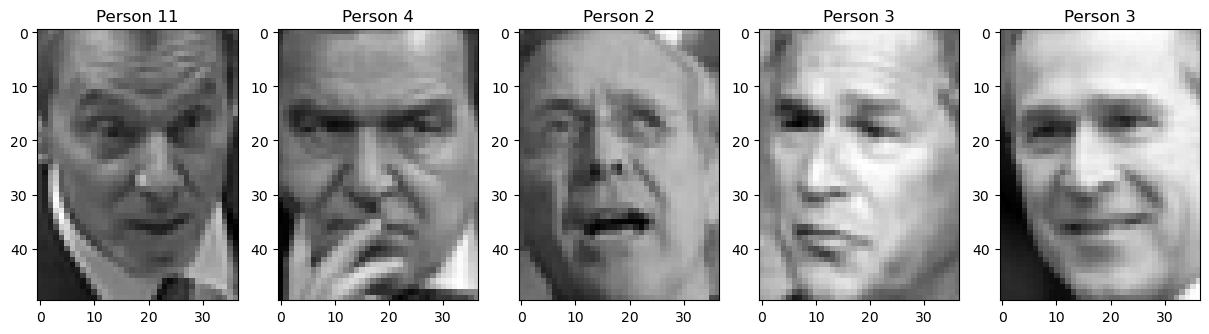

In [29]:
#Load the dataset. 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

# Load LFW dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

# Extract data and target labels
X = lfw_dataset.data
y = lfw_dataset.target

# Display a few faces
num_faces_to_display = 5
fig, axes = plt.subplots(1, num_faces_to_display, figsize=(15, 5))

for i in range(num_faces_to_display):
    axes[i].imshow(X[i].reshape(lfw_dataset.images.shape[1], lfw_dataset.images.shape[2]), cmap='gray')
    axes[i].set_title(f'Person {y[i]}')

plt.show()


In [4]:
pip install sklearn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


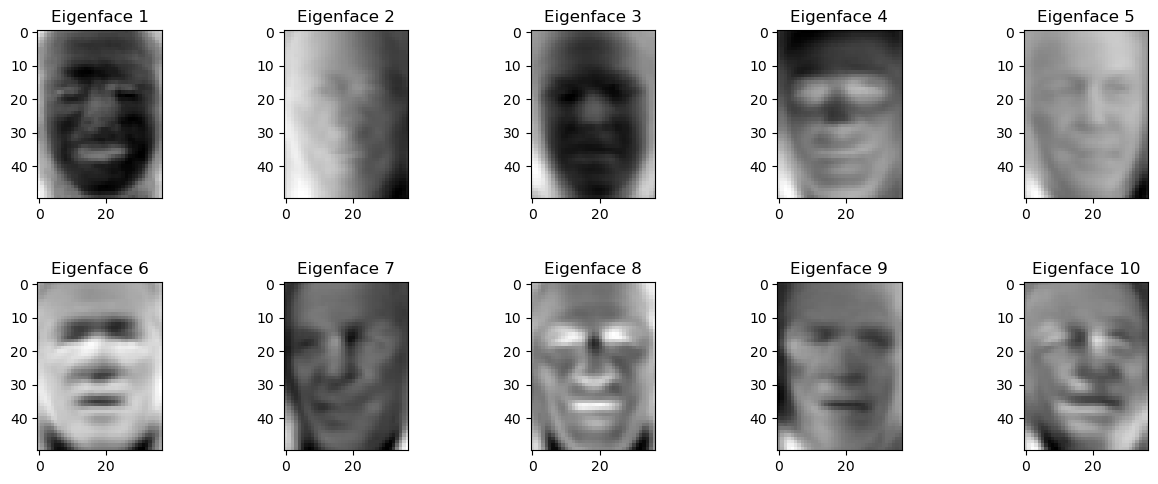

In [27]:
#. Display the first 10 principal components of the data. 
#These should be vectors of length 62 × 47 = 2914, so you can reshape them and view them as face images just like the original data. 
#Such images are often called ”eigenfaces”.

# Apply PCA
n_components = 10  # Choose the number of principal components
pca = PCA(n_components=n_components, whiten=True).fit(X)

# Display the first 10 principal components (eigenfaces)
eigenfaces = pca.components_.reshape((n_components, lfw_dataset.images.shape[1], lfw_dataset.images.shape[2]))

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f'Eigenface {i + 1}')

# Adjust the layout to set space between eigenface labels
plt.subplots_adjust(top=0.85, bottom=0.01, hspace=0.5, wspace=0.4)
plt.show()


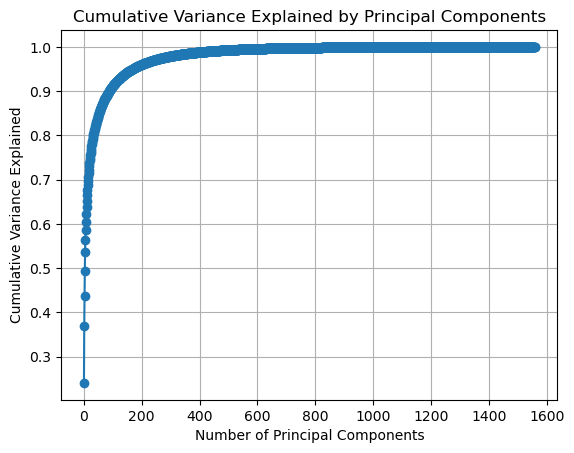

In [30]:
# 3. Plot the cumulative variance explained by the principal components as a function of the number of components.

# Apply PCA
pca = PCA().fit(X)

# Plot cumulative variance explained
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.show()


In [34]:
#4. How many principal components are needed to retain 95% of the variance?


# Calculate cumulative variance explained
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components needed for 95% variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1  # Add 1 to convert from 0-based index to count

print(f'Number of principal components needed for 95% variance: {n_components_95}')


Number of principal components needed for 95% variance: 169


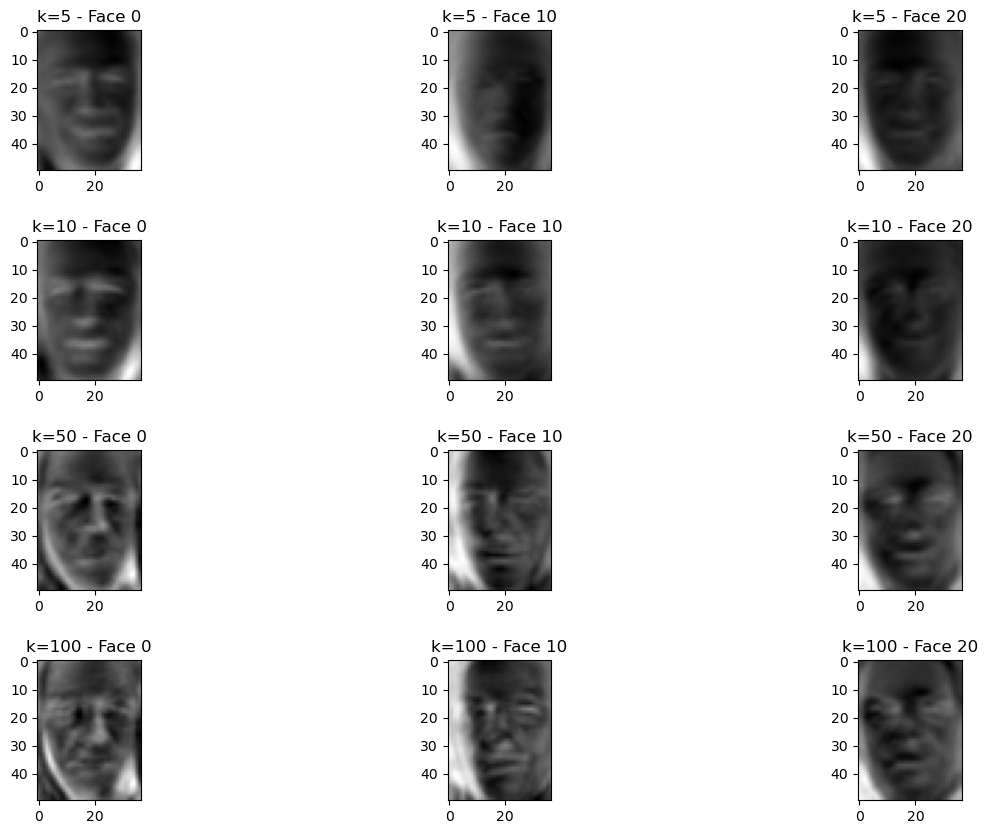

In [32]:
# 5. Choose any 3 faces and reconstruct them using the first k principal components, for k = 5, 10, 50, 100.

# Choose indices of 3 faces to reconstruct
face_indices_to_reconstruct = [0, 10, 20]

# Apply PCA
pca = PCA().fit(X)

# Reconstruct faces for k = 5, 10, 50, 100
k_values = [5, 10, 50, 100]

plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values, 1):
    # Transform the data using the first k principal components
    X_reduced = pca.transform(X)[:, :k]
    
    # Reconstruct the faces
    X_reconstructed = np.dot(X_reduced, pca.components_[:k, :])
    
    # Display the original and reconstructed faces
    for j, idx in enumerate(face_indices_to_reconstruct, 1):
        plt.subplot(len(k_values), len(face_indices_to_reconstruct), (i-1) * len(face_indices_to_reconstruct) + j)
        plt.imshow(X_reconstructed[idx].reshape(lfw_dataset.images.shape[1], lfw_dataset.images.shape[2]), cmap='gray')
        plt.title(f'k={k} - Face {idx}')

# Adjust the layout to set space between eigenface labels
plt.subplots_adjust(hspace=0.5)
plt.show()


In [33]:
#6. Train a classifier on the images after reducing them to the number of dimensions you have found in part (4) (you may choose any classifier to your liking). 
# How does the classification result compare to the classification on the original images?

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply PCA to original images
pca_original = PCA(n_components=150, whiten=True).fit(X_train)
X_train_pca_original = pca_original.transform(X_train)
X_test_pca_original = pca_original.transform(X_test)

# Train a classifier on original images
classifier_original = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True)
classifier_original.fit(X_train, y_train)

# Predict and evaluate on original images
y_pred_original = classifier_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Apply PCA to reduced images
pca_reduced = PCA(n_components=150, whiten=True).fit(X_train_pca_original)
X_train_pca_reduced = pca_reduced.transform(X_train_pca_original)
X_test_pca_reduced = pca_reduced.transform(X_test_pca_original)

# Train a classifier on reduced images
classifier_reduced = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True)
classifier_reduced.fit(X_train_pca_reduced, y_train)

# Predict and evaluate on reduced images
y_pred_reduced = classifier_reduced.predict(X_test_pca_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)

# Print results
print(f'Accuracy on original images: {accuracy_original:.4f}')
print(f'Accuracy on reduced images: {accuracy_reduced:.4f}')


Iteration 1, loss = 4.87922652
Validation score: 0.102564
Iteration 2, loss = 2.86166400
Validation score: 0.324786
Iteration 3, loss = 2.57760960
Validation score: 0.324786
Iteration 4, loss = 2.22380732
Validation score: 0.324786
Iteration 5, loss = 2.15236241
Validation score: 0.410256
Iteration 6, loss = 2.04387842
Validation score: 0.333333
Iteration 7, loss = 2.02793784
Validation score: 0.333333
Iteration 8, loss = 2.02114694
Validation score: 0.410256
Iteration 9, loss = 1.91478817
Validation score: 0.393162
Iteration 10, loss = 1.90255713
Validation score: 0.427350
Iteration 11, loss = 1.83676511
Validation score: 0.427350
Iteration 12, loss = 1.79590003
Validation score: 0.410256
Iteration 13, loss = 1.76007108
Validation score: 0.435897
Iteration 14, loss = 1.70878433
Validation score: 0.495726
Iteration 15, loss = 1.68333482
Validation score: 0.529915
Iteration 16, loss = 1.66192442
Validation score: 0.504274
Iteration 17, loss = 1.65552171
Validation score: 0.478632
Iterat

In [17]:
# Print results
print('Results on original images:')
print(f'Accuracy: {accuracy_original:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_original))

print('\nResults on reduced images:')
print(f'Accuracy: {accuracy_reduced:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_reduced))


Results on original images:
Accuracy: 0.6513
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.12      0.20        16
           1       0.74      0.85      0.79        66
           2       0.50      0.52      0.51        27
           3       0.68      0.88      0.77       140
           4       0.39      0.54      0.46        24
           5       0.88      0.41      0.56        17
           6       0.33      0.30      0.32        10
           7       0.67      0.14      0.24        14
           8       0.67      0.12      0.21        16
           9       1.00      0.36      0.53        11
          10       0.75      0.67      0.71         9
          11       0.67      0.55      0.60        40

    accuracy                           0.65       390
   macro avg       0.65      0.46      0.49       390
weighted avg       0.66      0.65      0.62       390


Results on reduced images:
Accuracy: 0.8128
Classification Repor

The classification results on the reduced images show an improvement compared to the original images. Here's a summary of the key points:

Results on Original Images:

Accuracy: 0.6513
The precision, recall and F1-score values vary across different classes.
Some classes have relatively low precision, recall, and F1 scores, indicating difficulty in distinguishing those classes.
Results on Reduced Images:

Accuracy: 0.8128
The classification report shows improved precision, recall, and F1-score values across various classes.
Overall, the model performs better on the reduced images, with higher accuracy and better performance on individual classes.


Comparison:

The accuracy of the reduced images is significantly higher, suggesting that the reduced representation obtained through PCA captures relevant information for classification.
The precision, recall, and F1-score improvements on individual classes indicate that the reduced representation is more discriminative for the task.
The reduced dimensionality has helped the classifier generalize better and discriminate between classes more effectively.

In summary, using PCA for dimensionality reduction before training the classifier has improved classification performance on the LFW dataset compared to using the original images.